# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [339, 242,  10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2617,1188,5332,9584,573,1942
1,18226,659,2914,3752,586,578
2,3366,5403,12974,4400,5977,1744


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Compare the three samples  with the statistics of the dataset separately, we have the following chart.


|       | Fresh     | milk      |Grocery   | Frozen   |Detergents_Paper|Delicatessen|
| :---: | :-------: | :-------: | :------: | :------: | :------------: | :--------: | 
|0      | <25%      |  <25%     | 25%-50%  | >75%     | 25%-50%        |  >75%      |
|1      | >75%      |  <25%     |  <25%    | >75%     | 25%-50%        |  25%-50%   |
|2      | 25%-50%   |  50%-75%  |  >75%    | >75%     |  >75%          |  50%-75%   |


So the three samples are totally different in the columns fresh, grocery and delicatessen. 

The first sample is high in frozen and delicatessen, above the median in detergents_paper, low in fresh and milk,so it is likely it is a deli restaurant.
The second sample is high in fresh and frozen and low in milk and grocery. It is possible that it is a retailer specializing in fresh and frozen food.
The third sample is high in grocery, frozen and detergents_paper. And its spend on milk and delicatessen is above the median. So I guess it is a supmarket selling all categories.


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
339   20.7  18.4     55.5    94.3              42.7          78.0
242   78.6   6.2     36.1    76.4              43.2          33.9
10    26.9  64.5     82.0    79.5              84.3          73.2


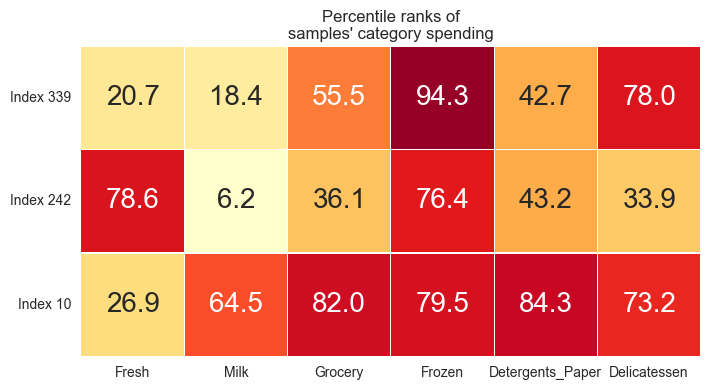

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, annot_kws={'size':20}, linewidth=.1, vmax=99, 
            fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.title('Percentile ranks of\nsamples\' category spending')

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [12]:
data.columns

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [13]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
ft='Grocery'
new_data = data.drop([ft],axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data[ft],test_size=0.25, random_state=2017)

# TODO: Create a decision tree regressor and fit it to the training set
from  sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=2017)
regressor.fit(X_train,y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print score

0.631369531751


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 
I predicted the feature 'Grocery'. And the prediction score is 0.6314. Since R^2 is positive and not small, it means the feature 'Grocery' can be predicted by the other features, so it may not be necessary for identifying customer's spending habits. 

If R^2 is negative, then it is necessary to include the feature to identify customers' spending habits.

Note: Detecting redundant features is a common step during feature selection.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

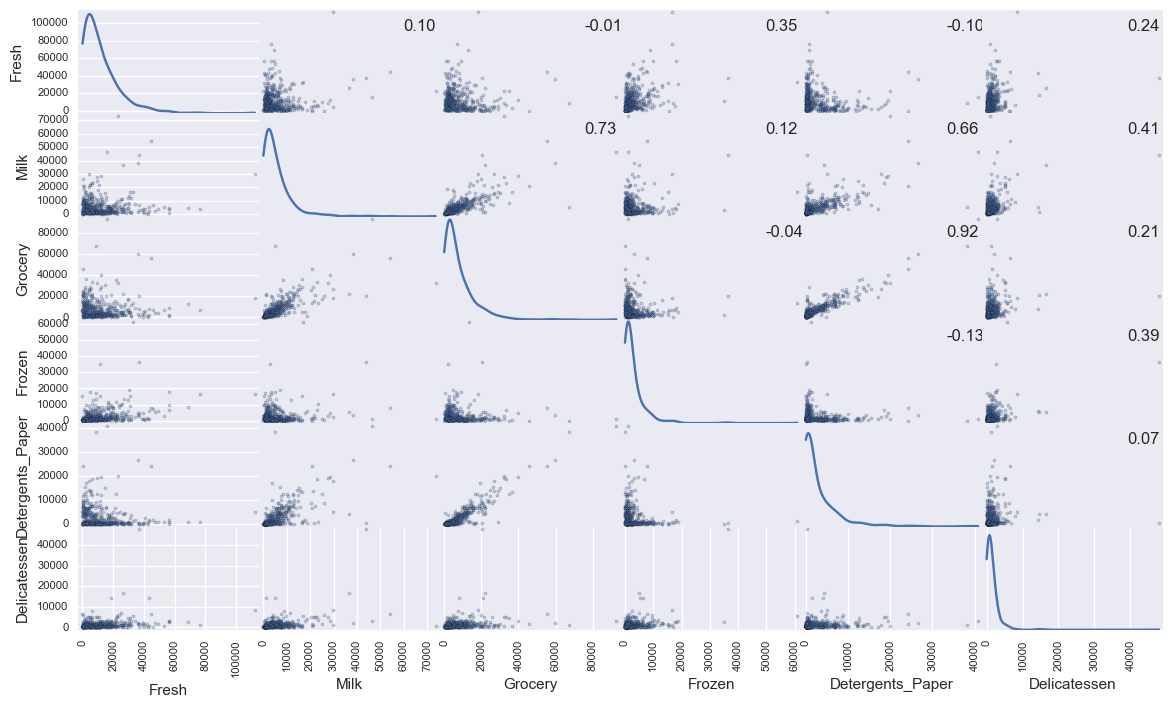

In [18]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Reformat data.corr() for plotting
corr = data.corr().as_matrix()

# Plot scatter matrix with correlations
for i,j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.2f"%corr[i,j], (0.8,0.8), xycoords='axes fraction')


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The following pairs show some degree of correlation: Milk and grocery, milk and detergents_paper, grocery and detergents_paper. It confirms my suspicions about the feature 'grocery'.  Since 'grocery' has correlation to 'milk' and 'detergents_paper', we can use a regression model to predict the values of 'grocery', that is shown in the value of R^2. 

The data of all features doesn't distribution normally. Their spikes are at left and most points lie left. After the spike, the density curves drop quickly.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

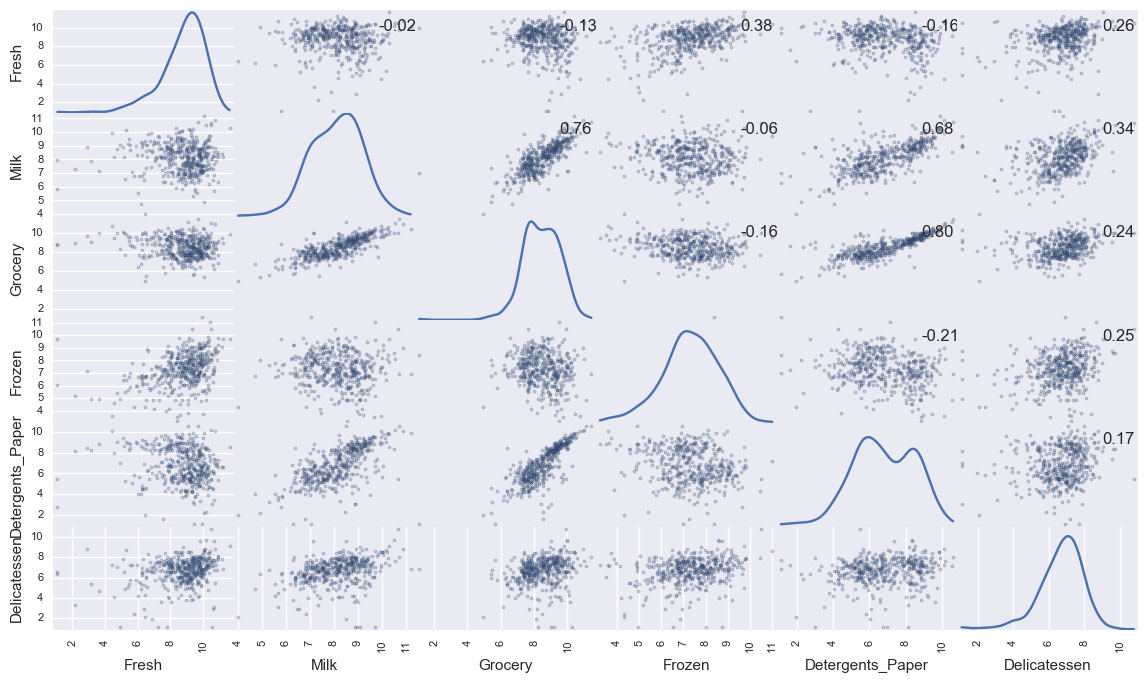

In [21]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features

axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')


# Reformat data.corr() for plotting
corr = log_data.corr().as_matrix()

# Plot scatter matrix with correlations
for i,j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.2f"%corr[i,j], (0.8,0.8), xycoords='axes fraction')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [22]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.869784,7.080026,8.581482,9.167850,6.350886,7.571474
1,9.810604,6.490724,7.977282,8.230044,6.373320,6.359574
2,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [23]:
# For each feature find the data points with extreme high or low values
outliers_indices={}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 =  np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_samples=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers_indices[feature]=outlier_samples.index
    #print outliers_indices[feature]
# OPTIONAL: Select the indices for data points you wish to remove
outliers=set()
for feature in log_data.keys():
    outliers  = outliers.union(set(outliers_indices[feature]))
outliers=list(outliers)

# Are there any data points considered outliers for more than one feature?
indices=[]
for feature in log_data.keys():
      indices.extend(list(outliers_indices[feature]))
from collections import Counter
duplicate=Counter(indices)
duplicate_indices=[key for key in duplicate.keys() if duplicate[key]>1 ]



# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[duplicate_indices]).reset_index(drop = True)



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [81]:
good_data.shape

(435, 6)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [24]:
duplicate_indices

[128, 154, 65, 66, 75]

**Answer:**
The data points with indices 128,154,65,66,75 are outliers for more than one feature.When the clustering method we are to use are not robust and sensitive to outliers, they should be removed.

Note: [Outlier detection](http://machinelearningmastery.com/how-to-identify-outliers-in-your-data/) and removal can be very subjective, and while we definitely benefit by reducing the skewness of the data and avoiding [effects on k-means clustering](http://stackoverflow.com/questions/13989419/removing-outliers-from-a-k-mean-cluster), there are also costs.

We don't want to reduce our dataset size too much, given that it's already quite small. Also, outliers can contain valuable information that we may want to analyze. In this case, those outliers may be very important customers, and we should be careful not to neglect them.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.0026,-0.7192,-0.3554,0.0331,0.5582,0.2092
Dimension 6,0.0204,-0.0292,0.5402,-0.8205,-0.0205,0.1824,-0.0197


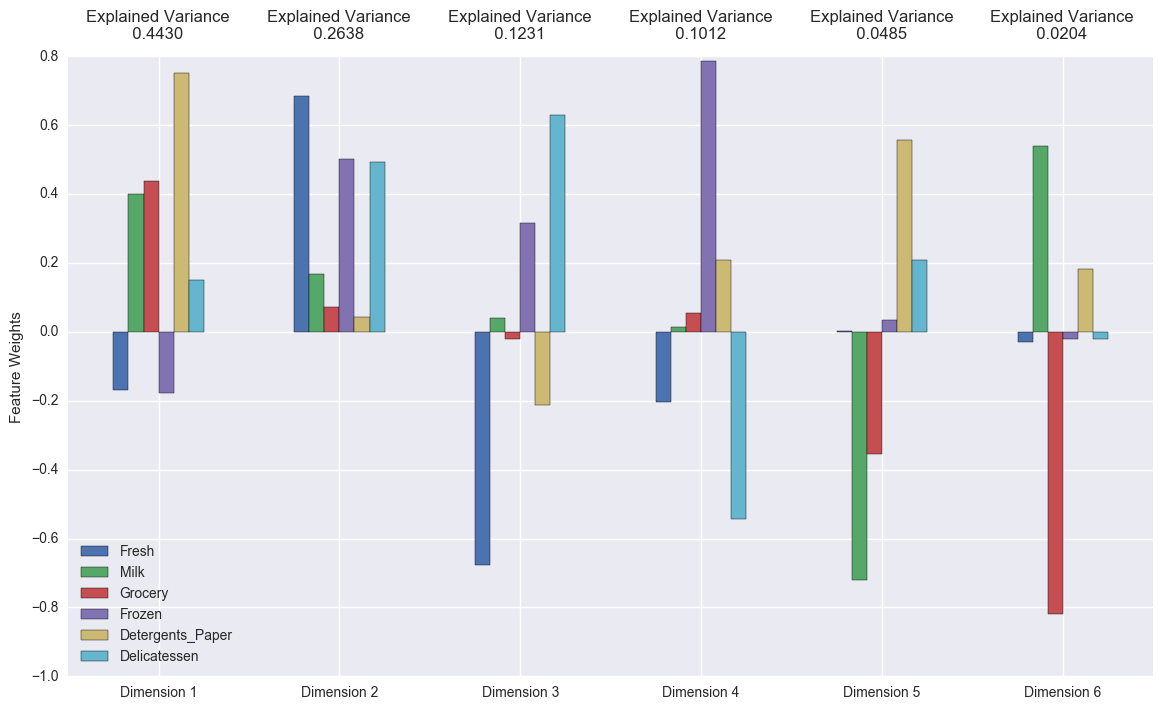

In [25]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition  import  PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
pca_results

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first and second principle component explain 70.68% of the variance.  The first four principle components explain 93.11% of the variance.  

The visualization shows the coefficients(weights) of all features for the six components. A positive weight of a feature corresponds positive effect on the principle component, and a negative weight of a feature to a component corresponds to negative effect.

The first component: Detergents_paper has weight nearly 0.8,  milk and grocery have weights around 0.4. Delicatessen's weight is about 0.15. Fresh and frozen have negative weights. This is consistant with the result in the correlation analysis that grocery, milk and detergents_paper are correlated. 

The second component: It puts more weights on fresh (around 0.7), frozen and delicatessen (0.5). Since the first component contains the information of detergents_paper, milk and grocery, it is resasonable that the second component is related to the rest factors. 

The third component: Delicatessen has weight nearly 0.7, frozen has weight about 0.3. Fresh has negative weight (-0.7). 

The fourth component: Frozen has weight nearly 0.8, detergents_paper has weight 0.2. Fresh and deli have negative weights.


Note:"
PCA deals with the variance of the data and the correlation between features. For example, the first component shows that we have a lot of variance in customers who purchase Milk, Grocery & Detergents_Paper — customers with HIGH first component values (e.g., retailers) purchase a lot of these 3 categories, while those with LOW component values (e.g., restaurants) purchase very little."

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.7513,0.5551,1.7899,1.0547,0.7029,-0.7766
1,-1.5752,0.6778,-0.5986,0.5424,1.0746,-0.6084
2,2.0887,0.7006,0.8537,1.0105,0.5587,-0.2495


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.7513,0.5551
1,-1.5752,0.6778
2,2.0887,0.7006


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

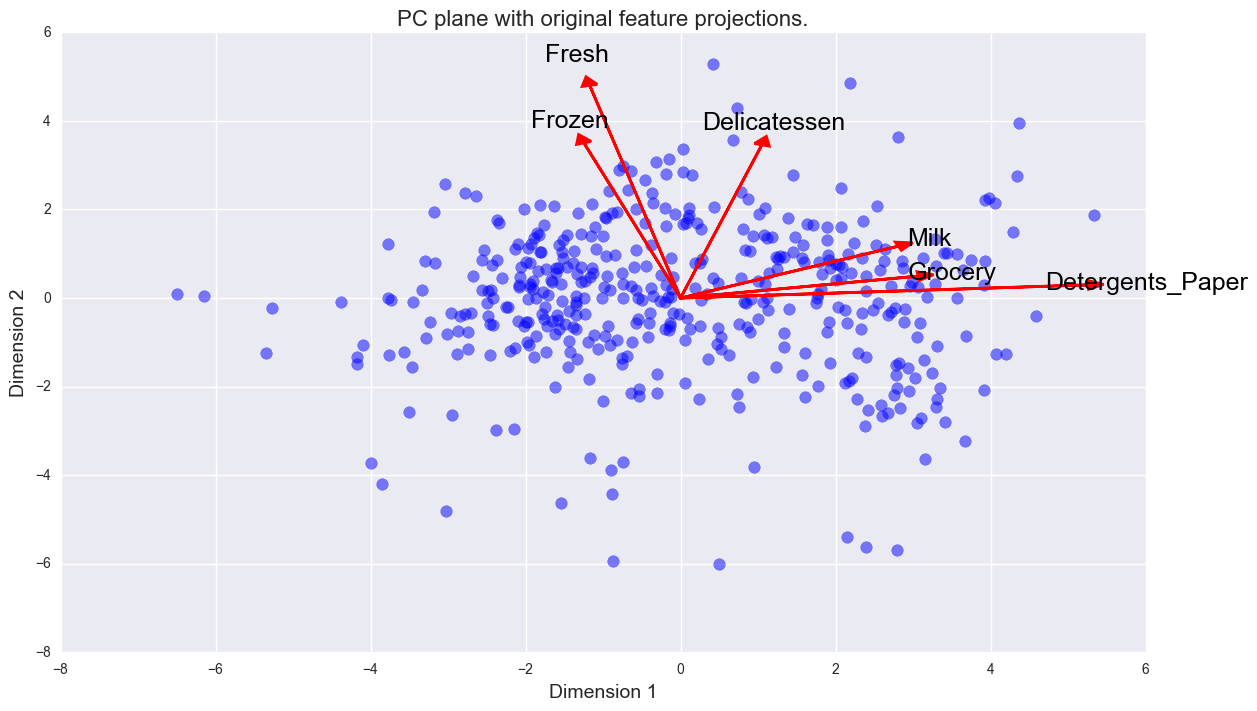

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

[check this](http://setosa.io/ev/principal-component-analysis/) and [this](https://algobeans.com/2016/06/15/principal-component-analysis-tutorial/)

[dimension reduction](https://sebastianraschka.com/faq/docs/dimensionality-reduction.html)

If we view a scatter matrix of the reduced data, we can see 2 humps in the 1st Dimension that seem to indicate the presence of 2 distinct groups within the distribution...

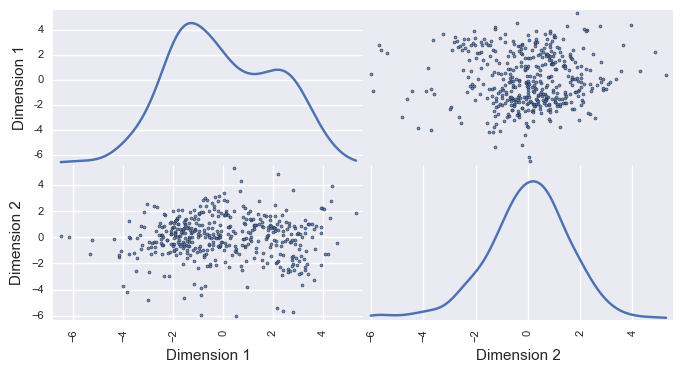

In [30]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');


### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 

**Assumptions of K-Means:** 

1)assume balanced cluster size within the dataset;

2)assume the joint distribution of features within each cluster is spherical: this means that features within a cluster have equal variance, and also features are independent of each other;

3)clusters have similar density;

4) K-Means is a special case of Gaussian Mixture Model in which each cluster’s covariance along all dimensions approaches 0. 

**Advantages of K-Means:**
1) It is faster, time complexity is linear with the number of data.
2) It works great if clusters are spherical
3) It is easy to interpret.

**Disadvantages of K-Means:**

1) uniform effect: often produce clusters with relatively uniform size even if the input data have different cluster size;

2) spherical assumption hard to satisfied: correlation between features break it, would put extra weights on correlated features(should take actions depending on the problems); cannot find non-convex clusters or clusters with unusual shapes;

3) different densities: may work poorly with clusters with different densities but spherical shape;

4) K value not known: how to solve K? 1)for small range of K value, say 2-10, for each K value run lots of times(20-100times), take the clustering result with the lowest J value among all K values; 2) using Elbow method to decide K value; 3) GAPs; 4)decide the K down streams: decide by the purposes/goals of the projects.

5) sensitive to outliers;

6) sensitive to initial points and local optimal, and there is no unique solution for a certain K value: thus run K mean for a K value lots of times(20-100times), then pick the results with lowest J;

**Assumptions of Gaussian Mixture Model:**

**Advantages of GMM:**
1) unlike spherical shapes in kmeans, each cluster in GMM can have unconstrained covariance structure. It can fit more complex cluster shapes since each mixture component can freely fit its covariance matrix. 

2) Unlike K-Means with hard assignment, GMM gives the degree to which a point belongs to each cluster, so it is soft assginment.



**Disadvantages of GMM:**
1) It may converge to a local optima depending on the initialization of clusters.
This can be overcomed by multiple  initialization.
2) It is a much more complicated model to train. The common algorithm is the EM algorithm. There are a lot of parmeters to estimate,  especailly when there are many features. So sometimes, we may restrict the covariance matrix to be diagonal, then the number of parameters to estimate will be linear to the number of the features.
3) When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
4) This algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.

Since there are only 6 features, and the number of samples in not that large, I choose GMM. 

** References: **

(1)[ What are the advatages of K-Means] (https://www.quora.com/What-are-the-advantages-of-K-Means-clustering)

(2)[ Questions on K-Means](https://faye1010.wordpress.com/2016/12/25/questions-on-k-means-method/)

(3)[What are the advantages to using a Gaussian Mixture Model clustering algorithm?](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm)

(4) [Clustering](http://scikit-learn.org/stable/modules/clustering.html)

(5) [Gaussian mixture models](http://scikit-learn.org/stable/modules/mixture.html#mixture)

Further reading:

(1) [Differences bewteen the two models:](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

(2) [How are they related?](http://stats.stackexchange.com/questions/76866/clustering-with-k-means-and-em-how-are-they-related)

A summary:

Speed/Scalability:

K-Means faster and more scalable
GMM slower due to using information about the data distribution — e.g., probabilities of points belonging to clusters.

Cluster assignment:

K-Means hard assignment of points to cluster (assumes symmetrical spherical shapes)
GMM soft assignment gives more information such as probabilities (assumes elliptical shape)


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [31]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
def cluster_model(n_components, data):
    clusterer = GMM(n_components=n_components, covariance_type='full',random_state=10).fit(data)
    preds=clusterer.predict(data)
    centers=clusterer.means_
    sample_preds=clusterer.predict(pca_samples)
    score=silhouette_score(reduced_data,preds,random_state=10)
    #print score
    return score,preds,centers,sample_preds

In [32]:
score={}
for n in range(2,15):
    score[n],preds,center,sample_preds=cluster_model(n,reduced_data)
score

{2: 0.41174985627969996,
 3: 0.39699775228989503,
 4: 0.28867498655987428,
 5: 0.1882133063074953,
 6: 0.25264248863260691,
 7: 0.31192512391707788,
 8: 0.20427163680377863,
 9: 0.15352514764372702,
 10: 0.21861964513154503,
 11: 0.17796726987675096,
 12: 0.16333721944596513,
 13: 0.10912831951468349,
 14: 0.09444416866119458}

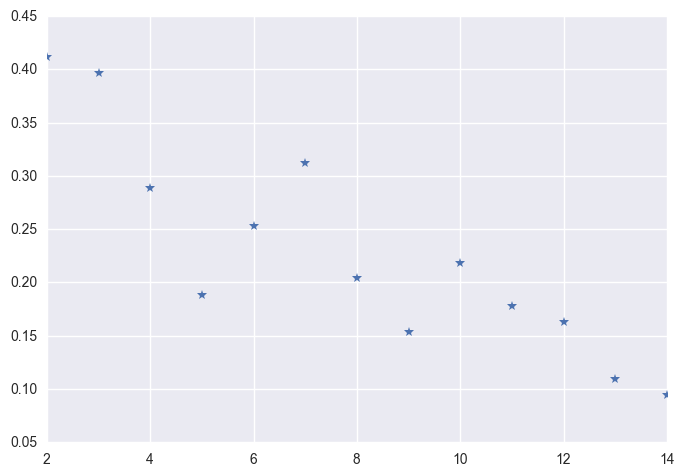

In [33]:
import matplotlib.pyplot as plt
plt.plot(score.keys(),score.values(),'*')

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 

The silhouette scores are as follows:
{2: 0.41174985627969996,
 3: 0.39904734596850527,
 4: 0.27722895836750794,
 5: 0.17213758192899276,
 6: 0.23010285471106046,
 7: 0.26925381591186437,
 8: 0.20551597775208985,
 9: 0.16983565403027415,
 10: 0.16798167579124745}.
 
 When the number of clusters is 2, we achieve the best silhouette score, which is 0.412. The scores tend to decrease as the number of clusters increases, so it is unlikely that we can get a better score for number of clusters greater than  14.



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

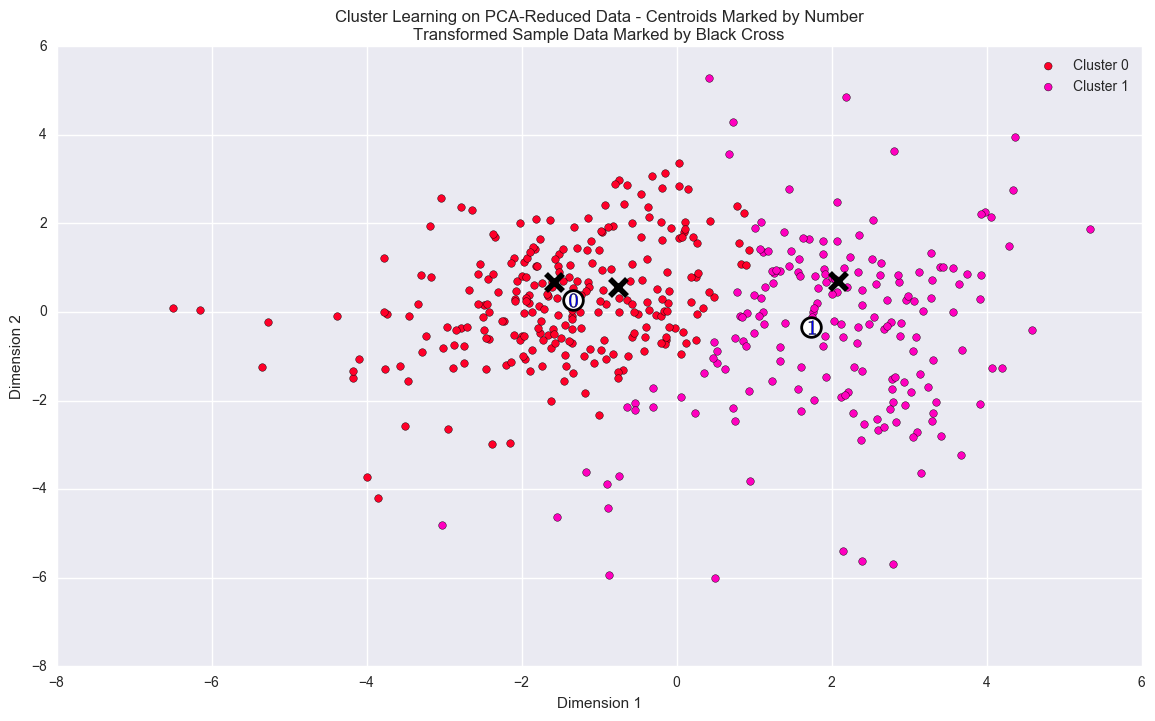

In [34]:
# Display the results of the clustering from implementation
best_score,preds,centers,sample_preds=cluster_model(2,reduced_data)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [35]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


The true_centers spending data shows us that...

The clusters appear to be generally split on spending in the 1st pca dimension
The centers are differentiated from each other by having above or below average spending in Milk, Grocery, Detergents_Paper

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 is high in fresh, frozen (50%-75%), below median on milk, grocery, detergents_paper and delicatessen (25%-50%). (Note: the spend on delicatessen is near the median.) So segment 0 may represents retailers selling mostly fresh and frozen food. 

Segment 1 is high in milk, grocery and detergents_paper (50%-75%). And it is below the median on fresh, frozen and delicatessen. So it may represents restaurants or cafes. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [36]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [40]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2617,1188,5332,9584,573,1942
1,18226,659,2914,3752,586,578
2,3366,5403,12974,4400,5977,1744


In [41]:
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


In [42]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:** 
We observe that

|         | Fresh     | milk      |Grocery   | Frozen   |Detergents_Paper|Delicatessen|
| :-----: | :-------: | :-------: | :------: | :------: | :------------: | :--------: | 
|segment 0|50%-75%    | 25%-50%   | 25%-50%  | 50%-75%  | 25%-50%        |  25%-50%   |
|segment 1|25%-50%    |50%-75%    |50%-75%   | 25%-50%  | 50%-75%        | neary 50%  |

and 

|       | Fresh     | milk      |Grocery   | Frozen   |Detergents_Paper|Delicatessen|
| :---: | :-------: | :-------: | :------: | :------: | :------------: | :--------: | 
|0      | <25%      |  <25%     | 25%-50%  | >75%     | 25%-50%        |  >75%      |
|1      | >75%      |  <25%     |  <25%    | >75%     | 25%-50%        |  25%-50%   |
|2      | 25%-50%   |  50%-75%  |  >75%    | >75%     |  >75%          |  50%-75%   |


For Sample point 0, the distributions for Grocery, Milk, and Detergents_Paper are similar to that of segment 0.   So the predicted cluster seems to be consistent with the sample.

For sample point 1, the distributions for fresh, milk, grocery, frozen, detergents_paper and delicatessen are similar to the of segment 0, as the prediction by the model.

For sample point 2, the distributions of fresh, milk, grocery, detergents_paper and delicatessen are more similar to that of the segment 1, which is consistant with the prediction of the model.





Sample point 0  belongs to cluster 0, which represents retailer selling fresh food and frozen food. My former guess was deli restaurant. So they are not consistent.

Sample point 1 belongs to cluster 0. From question 8, I guess this cluster represents retailer selling fresh and frozen food. It is consistant with my guess in the beginning. 



Sample point 2 belongs to cluster 1, which represents restaurants.  My former guess, however, is that it is a supermarket sell all catergories.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

For segment 0, since it has a high weight on fresh food, customers from this segment may react negatively to the reduction of delivery times. Because they want to keep fresh food fresh. 

For segment 1, they may be not so sensitive to the change. Usually, milk and grocery can be kept fresh if the delivery frequency is 3 days a week. 

Another aspect should be took into consideration is that for some small retailer, they don't have much space to reserve enough inventory. So when reducing the number of delivery times, distributors should pay attention to small retailers.

Since we are not sure whether the change will be positive or negative, to be safe, the distributor should run A/B tests: select a fraction of customers from each segment randomly and only reduce the delivery frequence for the those customers. After one or two weeks, make a survey to get their reactions to the changes. Then compare with that of the control groups from the two clusters. Make decisions according to the results of the A/B tests.


1. Split Segment 0 customers into "A/control" & "B/treatment" groups for testing
2. Split Segment 1 customers into "A/control" & "B/treatment" groups for testing

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The cluster assignments can be used as labels in the supervised learner. Then use the six features as predictors to train a classifier. If the classifier performs well, then it can be used to make prediction for the new customers. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

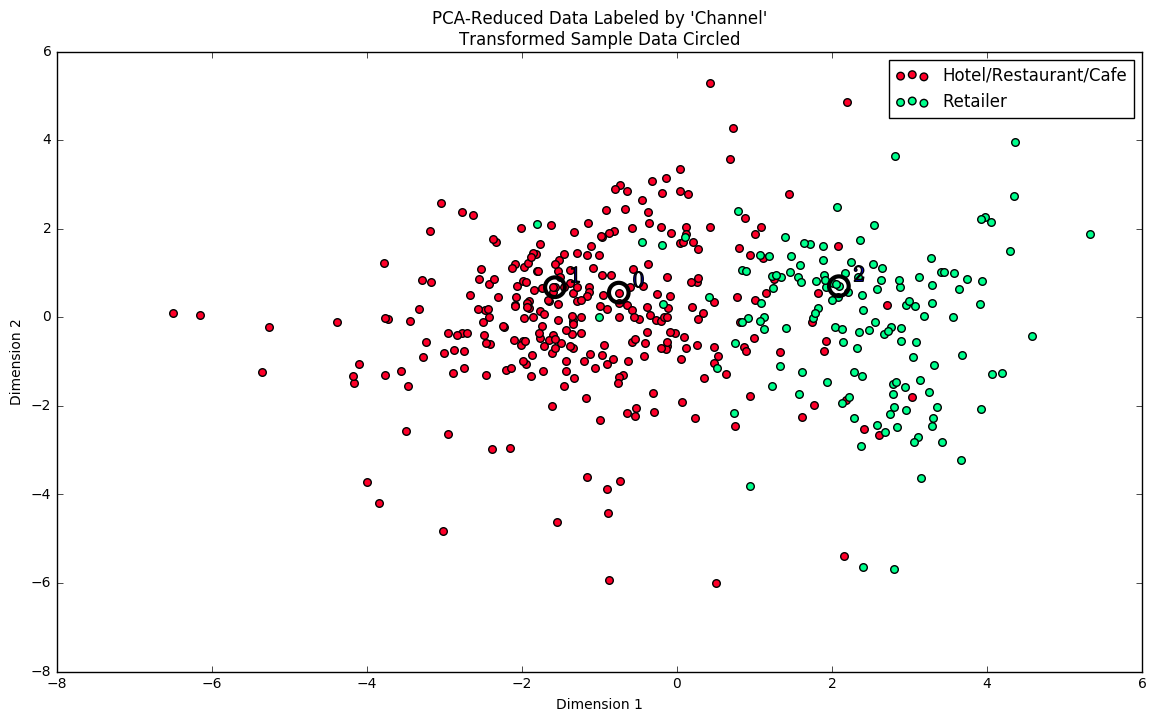

In [126]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, duplicate_indices, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The clustering algorithm performs well: we chosen 2 clusters by the silhouette coefficient, which is consistant with the underlying 'channels'. 

There are data points that would be calssified as purely 'retailer' or 'Hotels/Restaurants/cafes'. They lie on the left and right boundaries respectively. 

And the guess of the customer segments was retailers and restaurants/cafes  for cluster 0 and cluter 1 respectivly, the same as the labels given by 'channels'. 

<img src="clusters.png">

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.